# Ultimate Challenge

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [64]:
# Read json file
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [65]:
#Check for any data type issue
logins_df.dtypes

login_time    datetime64[ns]
dtype: object

In [66]:
#Check for any null values and then set the login time as the index
logins_df.info()
logins_df.set_index('login_time', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [67]:
#As there are no null values. We will now agregate the login time by 15 minutes interval
logins_df['count'] =''
logins_df = logins_df.resample('15T').count()
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 0, 'Login Time')

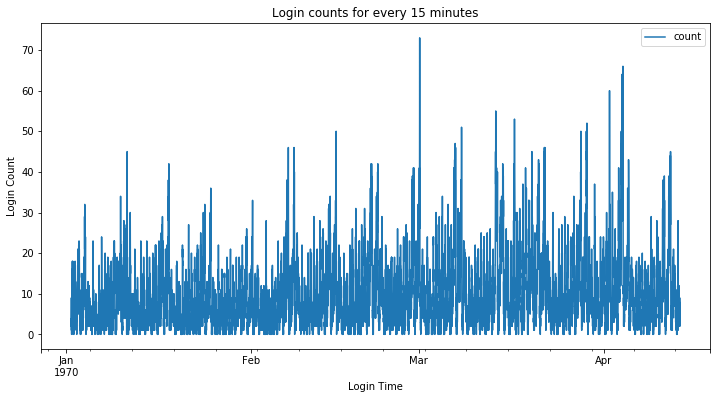

In [68]:
logins_df.plot(kind='line',figsize=(12,6))
plt.title('Login counts for every 15 minutes')
plt.ylabel('Login Count')
plt.xlabel('Login Time')

From the figure, its hard to interpret the distribution for every 15 minutes as there is lot of overlaps. We will resample it by weeks to capture the underlying trend in the dataset.

In [69]:
#Resampling it by weeks
import calendar

days = list(calendar.day_abbr)
months = list(calendar.month_abbr)

# Re-read \the data
logins_df = pd.read_json('logins.json')
logins_df = logins_df.set_index('login_time')
logins_df['count'] =''
logins_df = logins_df.resample('15T').count()
logins_df['timestamp'] = pd.to_datetime(logins_df.index)

logins_df['month'] = logins_df['timestamp'].apply(lambda x: months[x.month])
logins_df['day'] = logins_df['timestamp'].apply(lambda x: days[x.weekday()])

logins_df.head()

,count,timestamp,month,day
login_time,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Jan,Thu
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Jan,Thu
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Jan,Thu
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Jan,Thu
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Jan,Thu


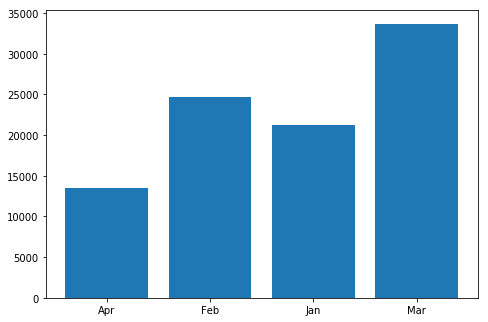

In [70]:
# Plotting bar graph to check the counts per each month
count_months = logins_df.groupby('month')['count'].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months=count_months.index
ax.bar(months,count_months)
plt.show()

From the plot, the logins seems to be raising starting from January. The month of April captures login details only till 13th, and hence we can assume that the logins are increasing steadily each month.

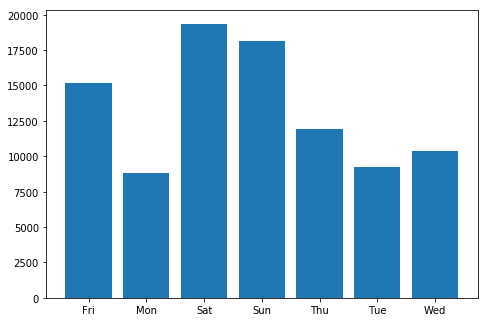

In [71]:
# Plotting bar graph to check the counts per weekday
count_days = logins_df.groupby('day')['count'].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days=count_days.index
ax.bar(days,count_days)
plt.show()

Its clear that the activity increases during the weekend with maximum logins being captured on Saturday. Mondays seems have low activity with nearly 8000 logins captured for that day.

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

In order for the drivers to serve both cities, the KPI would be the profit before and after reimbursement of tolls. The drivers would be flexible enough to serve both the cities only if they are able to make sufficient profit compared to the existing rides in their respective citites.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

We can perform A/B test to check effectiveness of the proposed change. We can select a group of drivers that gets toll reimbursement and the other which doesnt use the toll. We can compare the groups for the first six months period. A statistical test such as t-test with a p-value=0.5 can be used for the analysis.


3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If there are any improvement in the profit after toll reimbursement then definitely we need to look at the feature which are responsible it. If there are no changes, then we need to review feature which affecting the profitability of the ride even after the re-imbursement.  
  

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

In [72]:
#IImport data from json file and read that in to dataframe
import json

file = open('ultimate_data_challenge.json', 'r')
ultimate_df = pd.DataFrame(json.load(file))


In [73]:
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [74]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [75]:
ultimate_df[['signup_date', 'last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18,2014-06-29
freq,2948,2036


In [76]:
ultimate_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [77]:
# We should convert date field to datetime format as the fields are having 'object' data types
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

In [78]:
# There are close to 400 records which are having null values for the column'phone'. Lets drop those records as they are insignificant
ultimate_df= ultimate_df.drop(ultimate_df[ultimate_df.phone.isna()==True].index,axis=0)
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


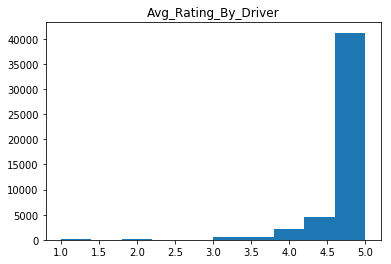

In [79]:
# Let's look at the distribution of values for avg_rating_by_driver

plt.hist(ultimate_df[ultimate_df['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])
plt.title('Avg_Rating_By_Driver')
plt.show;

In [80]:
# Lets file the null values with mean rating
ultimate_df['avg_rating_by_driver'].fillna(ultimate_df['avg_rating_by_driver'].mean(), inplace=True)

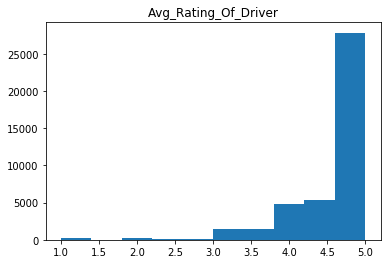

In [81]:
# Let's look at the distribution of values for avg_rating_of_driver

plt.hist(ultimate_df[ultimate_df['avg_rating_of_driver'].notnull()]['avg_rating_of_driver'])
plt.title('Avg_Rating_Of_Driver')
plt.show;

In [82]:
# Lets file the null values with mean rating
ultimate_df['avg_rating_of_driver'].fillna(ultimate_df['avg_rating_of_driver'].mean(), inplace=True)
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [83]:
#set current date 
current_date = ultimate_df['last_trip_date'].max()

In [84]:
#find whether the user qualifies as active
ultimate_df['active'] = ultimate_df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


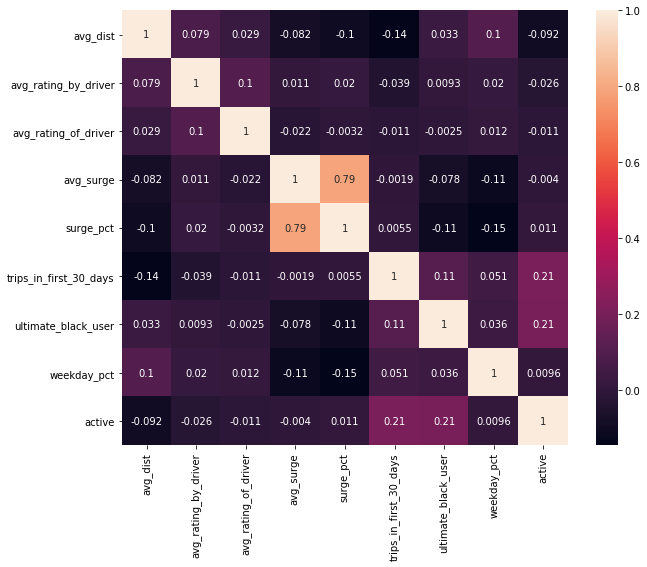

In [85]:
#Lets look how the features are correlated
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(ultimate_df.corr(), annot=True)

In [86]:
ultimate_df = pd.get_dummies(ultimate_df, prefix='is')

In [87]:
#feature 'surge_pct' is highly correlated. Removing the feature from dataframe along with dates
X= ultimate_df.drop(['active', 'surge_pct','last_trip_date','signup_date'], axis=1)
y= ultimate_df['active']

In [88]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.80, test_size=0.2, stratify=y)

In [103]:
#build random forest model
rf = RandomForestClassifier(n_estimators=500)
rf.fit(train_X,train_y)
y_pred = rf.predict(test_X)

In [104]:
rf.score(test_X,test_y)

0.7466989214796895

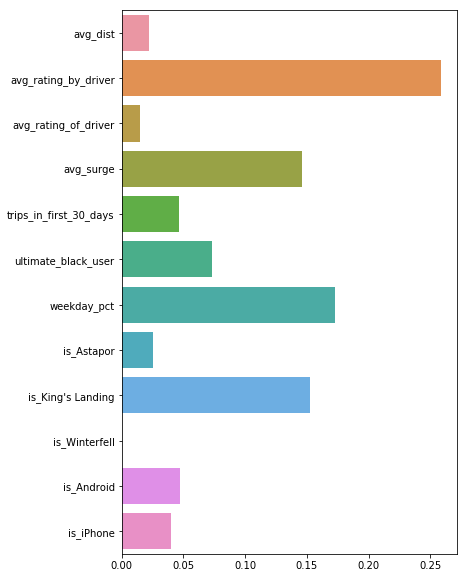

In [106]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)

Following are the top predictors for the model:
1)Avg rating by driver
2)weekend percetage
3)king's landing
